What is Credit Risk?

In simple words, it is the risk of borrower not repaying loan, 

credit card or any other type of loan. Sometimes customers pay some 

installments of loan but don't repay the full amount which includes 

principal amount plus interest.
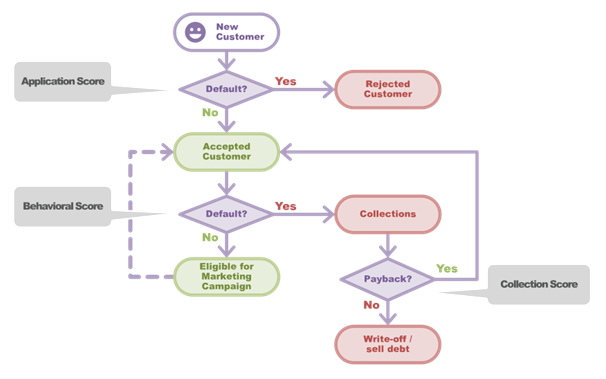

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv('/kaggle/input/newdata/loan_data.csv',low_memory=False)

In [3]:
data.info()

In [4]:
data.isnull().sum().head(40)

In [5]:
data.describe().T

In [6]:
data.loc[data['loan_status'].isin(['default'])]


In [7]:
data['loan_status'].value_counts()


In [8]:
target = [1 if i=='Default' else 0 for i in data['loan_status']]
data['target'] = target
data['target'].value_counts()

In [9]:

nulls = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

In [10]:
# Drop unneccesary columns
#data.drop('id','emp_title','url','desc',,'delinq_2yrs','earliest_cr_line','mths_since_last_delinq', 'mths_since_last_record',)

data = data.drop(['id','emp_title','emp_length','url','title','earliest_cr_line','mths_since_last_record','next_pymnt_d',
 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp','last_pymnt_d','mths_since_last_major_derog','annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m','desc',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis=1)

In [11]:
data.shape

In [12]:
#missing_fractions = data.isnull().mean().sort_values(ascending=False)

#missing_fractions.head(40)
#drop_list = sorted(list(missing_fractions[missing_fractions > 0.].index))
#print(drop_list)
#data.drop(labels=drop_list, axis=1, inplace=True)


In [13]:
data.columns

Since no customer has taken loan again, we can drop member id too.


In [14]:
data.drop(['member_id'], axis=1, inplace=True)


In [15]:
data['loan_amnt'].describe()


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plot_var('loan_amnt', 'Loan Amount', continuous=True)
sns.boxplot(x='target', y='loan_amnt', data=data)
plt.ylabel('Loan Amount')



In [17]:
sns.distplot(data['loan_amnt'],color='darkblue')
plt.xlabel('Loan Amount',fontsize=12)
plt.grid()

In [18]:
data['term'].value_counts(dropna=False)


In [19]:
data['term'] = data['term'].apply(lambda s: np.int8(s.split()[0]))


In [20]:
data['term'].value_counts(normalize=True)


In [21]:
data.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Default']


About 60% of the not deault loans have three-year periods, and the rest have five-year periods.

In [22]:
data['int_rate'].describe()


In [23]:
sns.distplot(data['int_rate'],color='darkblue')
plt.xlabel('Loan Interest Rate',fontsize=12)
plt.grid()

In [24]:
f, ax = plt.subplots(figsize=(7,4))
sns.barplot(y='int_rate', x="target",  data=data);

In [25]:
sns.distplot(data['installment'],color='darkblue')
plt.xlabel('Loan Installment',fontsize=12)
plt.grid()

In [26]:
#f, ax = plt.subplots(figsize=(7,4))
sns.barplot(y='installment', x="target",  data=data);

In [27]:
data.groupby('target')['installment'].describe()


In [28]:
print(sorted(data['grade'].unique()))


In [29]:
data['grade'].value_counts()

In [30]:
print(sorted(data['sub_grade'].unique()))


In [31]:
data.drop('grade', axis=1, inplace=True)


In [32]:
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='sub_grade', y="target",  data=data);

In [33]:
data.columns

In [34]:
data['home_ownership'].value_counts(dropna=False)


In [35]:
data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)


In [36]:
data['home_ownership'].value_counts()


In [37]:
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='home_ownership', y="target",  data=data);

In [38]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Default']

In [39]:
data['annual_inc'].describe()


In [40]:
data['annual_inc'] = data['annual_inc'].apply(lambda x: np.log10(x+1))


In [41]:
data['annual_inc'].describe()


In [42]:
sns.boxplot(x='target', y='annual_inc', data=data)
plt.ylabel('Anual Income')

It appears that individuals with higher income are more likely to pay off their loans. Let's compare the summary statistics by loan status:



In [43]:
data['purpose'].value_counts()


In [44]:
data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Default'].sort_values()

In [45]:
data['zip_code'].sample(5)
data.drop(labels='zip_code', axis=1, inplace=True)


In [46]:
data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Default'].sort_values()

Data Dictionary: "The number of open credit lines in the borrower's credit file."


In [47]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(data['open_acc'], order=sorted(data['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [48]:
data.groupby('target')['open_acc'].describe()


In [49]:
data['application_type'].value_counts()


In [50]:
data.drop(labels='application_type',axis=1,inplace=True)

In [51]:
data.columns

In [52]:
data['policy_code'].head()

In [53]:
data.drop(['policy_code','loan_status','collections_12_mths_ex_med','last_credit_pull_d','issue_d'],axis=1,inplace=True)

In [54]:
data.shape

In [55]:
missing_fractions = data.isnull().mean().sort_values(ascending=False)

# Fraction of data missing for each variable

In [56]:
print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data


There are no categorical variables with missing values, and therefore we don't need any NaN dummy variables.

Create dummy variables for the categorical variables:

In [57]:
categorical = []
for column in data:
    if data[column].dtype == 'object':
        categorical.append(column)
categorical

In [58]:
data = pd.get_dummies(data, columns=['sub_grade', 'home_ownership', 'verification_status','pymnt_plan','purpose', 'addr_state', 'initial_list_status'], drop_first=True)

In [59]:
data.head()

In [60]:
data.drop(labels='mths_since_last_delinq',axis=1,inplace=True)

In [61]:
# Train/test split

In [62]:
data.shape

In [63]:
y_train = data['target']
y_test = data['target']

In [64]:
X_train = data.drop('target', axis=1)
X_test = data.drop('target', axis=1)


In [65]:
X_train.head()

In [66]:
missing_fractions = data.isnull().mean().sort_values(ascending=False)

missing_fractions.head(40)


In [67]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.2].index))
print(drop_list)
data.drop(labels=drop_list, axis=1, inplace=True)


In [68]:
data.head()

7. Linear Dependence of Charge-off on the Predictors¶



In [69]:
linear_dep = pd.DataFrame()


In [70]:
for col in X_train.columns:
    linear_dep.loc[col,'pearson_corr'] = X_train[col].corr(y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])

In [71]:
from sklearn.feature_selection import f_classif
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), y_train.loc[mask])

In [72]:
from sklearn.feature_selection import f_classif
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), y_train.loc[mask])

In [73]:
print(linear_dep.head(20))


Here we can see the probability or each columns 

We will evaluate and compare the following models using a cross-validated AUROC score on the training set:

Logistic regression with SGD training
Random forest
k-nearest neighbors
We'll perform some hyperparameter tuning for each model to choose the most best model, then more carefully
tune the hyperparameters of the best-performing model.

Model Building

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

In [75]:
from sklearn.ensemble import RandomForestClassifier


In [76]:
pipeline_rfc = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [77]:
param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

In [78]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [80]:
grid_rfc.fit(X_train, y_train)


In [81]:
grid_rfc.best_score_


In [82]:
from sklearn.neighbors import KNeighborsClassifier


In [83]:
pipeline_knn = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))
])

In [84]:
param_grid_knn = {
    'lda__n_components': [3, 9], # Number of LDA components to keep
    'model__n_neighbors': [5, 25, 125] # The 'k' in k-nearest neighbors
}

In [85]:
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [91]:
grid_knn.fit(X_train, y_train)


In [87]:
grid_knn.best_score_


In [90]:
print('Cross-validated AUROC scores')
#print(grid_sgdlogreg.best_score_, '- Logistic regression')
print(grid_rfc.best_score_, '- Random forest')
print(grid_knn.best_score_, '- k-nearest neighbors')

In [92]:
param_grid_sgdlogreg = {
    'model__alpha': np.logspace(-4.5, 0.5, 11), # Fills in the gaps between 10^-5 and 10^1
    'model__penalty': ['l1', 'l2']
}